# importing necessary libraries

In [26]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics

# importing data

In [27]:
df=pd.read_csv("iris.csv")
print(df.columns)
df.head()


Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')


,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [28]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [29]:
df.shape

(150, 6)

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [31]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


# data preprocessing

In [32]:
df= df.drop(['Id'], axis = 1)
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [33]:
df.duplicated().sum()

3

In [34]:
df.drop_duplicates(keep = 'first', inplace = True)
df.duplicated().sum()

0

In [35]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

# data visualization

In [36]:
df['Species'].value_counts()


Iris-versicolor    50
Iris-virginica     49
Iris-setosa        48
Name: Species, dtype: int64

<Axes: xlabel='SepalWidthCm', ylabel='PetalWidthCm'>

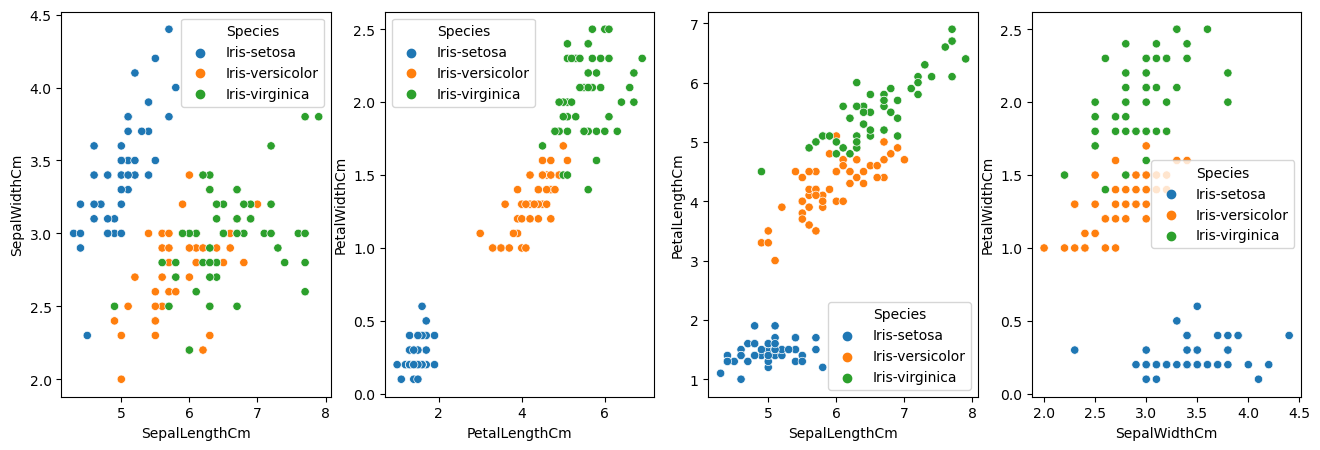

In [37]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(16,5))
sns.scatterplot(x = "SepalLengthCm", y = "SepalWidthCm", hue = 'Species', data = df, ax = ax1)
sns.scatterplot(x = "PetalLengthCm", y = "PetalWidthCm", hue = 'Species', data = df, ax = ax2)
sns.scatterplot(x = "SepalLengthCm", y = "PetalLengthCm", hue = 'Species', data = df, ax = ax3)
sns.scatterplot(x = "SepalWidthCm", y = "PetalWidthCm", hue = 'Species', data = df, ax = ax4)

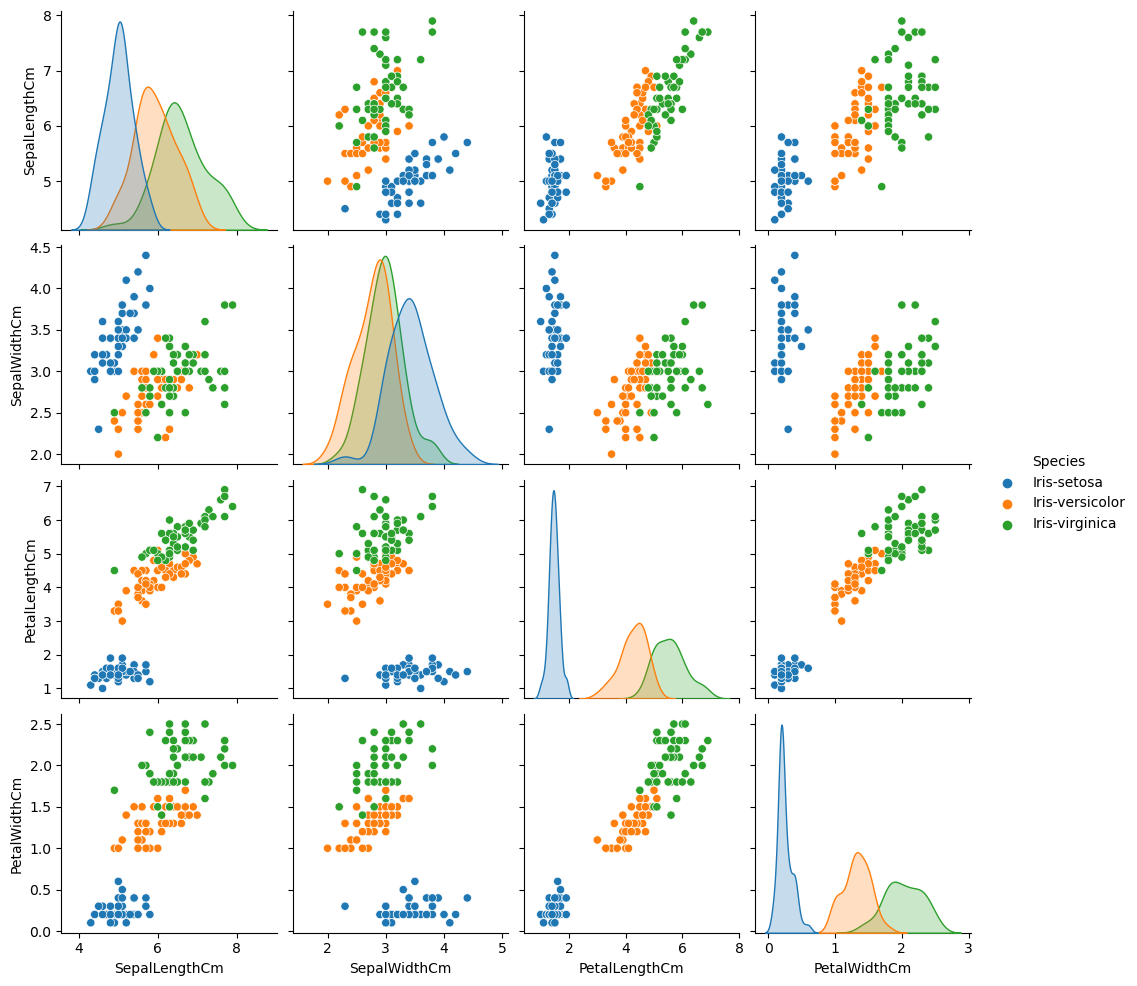

In [38]:
sns.pairplot(df,hue='Species')

observation:iris-versicolor and iris-virginica are overlapping

# Depedent AND Independent Variables

In [39]:
x,y=df.iloc[:,0:-1],df["Species"]


In [40]:
x

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [41]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 147, dtype: object

# split data into train and test part

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size = 0.2,random_state=4)
x_train

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
117,7.7,3.8,6.7,2.2
109,7.2,3.6,6.1,2.5
118,7.7,2.6,6.9,2.3
122,7.7,2.8,6.7,2.0
116,6.5,3.0,5.5,1.8
...,...,...,...,...
52,6.9,3.1,4.9,1.5
89,5.5,2.5,4.0,1.3
106,4.9,2.5,4.5,1.7
131,7.9,3.8,6.4,2.0


# train the model

In [43]:

from sklearn.neighbors import KNeighborsClassifier

In [44]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

# Make predictions on the testing set



In [45]:

y_pred = knn.predict(x_test)


#  Evaluate the accuracy of the classifier

In [46]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)


1.0